# 7333 - Quantifying the World
# Unit 8 Case Study
# Authors: Brandon De La Houssaye, Bruce Granger, Daniel Serna

In [11]:
import yahoo_fin
import requests_html
from yahoo_fin import stock_info as si
wmt_data = si.get_data("wmt", start_date = '10/15/2015', end_date = '10/15/2019')
wmt_data.head()

,open,high,low,close,adjclose,volume,ticker
date,,,,,,,
2015-10-15,59.700001,60.470001,58.610001,59.330002,53.602409,46253500.0,WMT
2015-10-16,59.470001,59.490002,58.369999,58.889999,53.204887,26195100.0,WMT
2015-10-19,58.790001,59.299999,58.500000,58.849998,53.168743,17805800.0,WMT
2015-10-20,58.860001,59.000000,58.570000,58.750000,53.078396,10423700.0,WMT
2015-10-21,58.799999,59.040001,58.570000,58.639999,52.979023,13117600.0,WMT


In [12]:
wmt_data_1=wmt_data.drop(columns = ['volume'])

In [26]:
wmt_data_2=wmt_data.drop(columns = ['open','high','low','close','volume'])

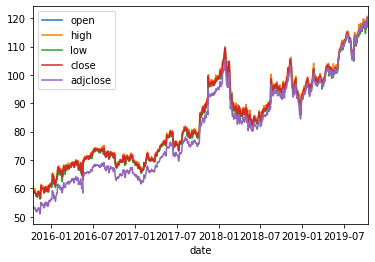

In [27]:
ax = wmt_data_1.plot()

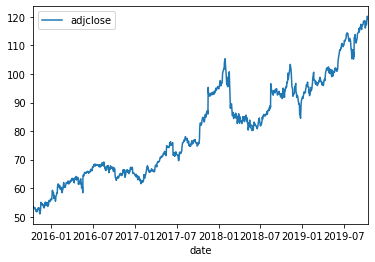

In [28]:
ax1=wmt_data_2.plot()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
   for param_seasonal in seasonal_pdq:
       try:
           mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
           results = mod.fit()
           print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
       except:
           continue